In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
base=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv')
'''var1=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant I.csv')
var2=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant II.csv')
var3=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv')
var4=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant IV.csv')
var5=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant V.csv')'''

"var1=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant I.csv')\nvar2=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant II.csv')\nvar3=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv')\nvar4=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant IV.csv')\nvar5=pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant V.csv')"

In [ ]:
base=pd.DataFrame(base)
'''var1=pd.DataFrame(var1)
var2=pd.DataFrame(var2)
var3=pd.DataFrame(var3)
var4=pd.DataFrame(var4)
var5=pd.DataFrame(var5)'''

'var1=pd.DataFrame(var1)\nvar2=pd.DataFrame(var2)\nvar3=pd.DataFrame(var3)\nvar4=pd.DataFrame(var4)\nvar5=pd.DataFrame(var5)'

In [ ]:
'''dataframes=[base,var1,var2,var3,var4,var5]
columns_list = [set(df.columns) for df in dataframes]
common_columns = set.intersection(*columns_list)
all_columns = set.union(*columns_list)
unique_columns = all_columns - common_columns
print(common_columns)
print(len(common_columns))
print(unique_columns)'''


'dataframes=[base,var1,var2,var3,var4,var5]\ncolumns_list = [set(df.columns) for df in dataframes]\ncommon_columns = set.intersection(*columns_list)\nall_columns = set.union(*columns_list)\nunique_columns = all_columns - common_columns\nprint(common_columns)\nprint(len(common_columns))\nprint(unique_columns)'

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
base.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [ ]:
base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [ ]:
base['payment_type'].unique()

array(['AA', 'AD', 'AB', 'AC', 'AE'], dtype=object)

In [ ]:
base['fraud_bool'].unique()

array([0, 1])

In [ ]:
contingency_table = pd.crosstab(base['payment_type'], base['fraud_bool'])
print("교차표:")
print(contingency_table)

교차표:
fraud_bool         0     1
payment_type              
AA            256885  1364
AB            366385  4169
AC            247862  4209
AD            117551  1286
AE               288     1


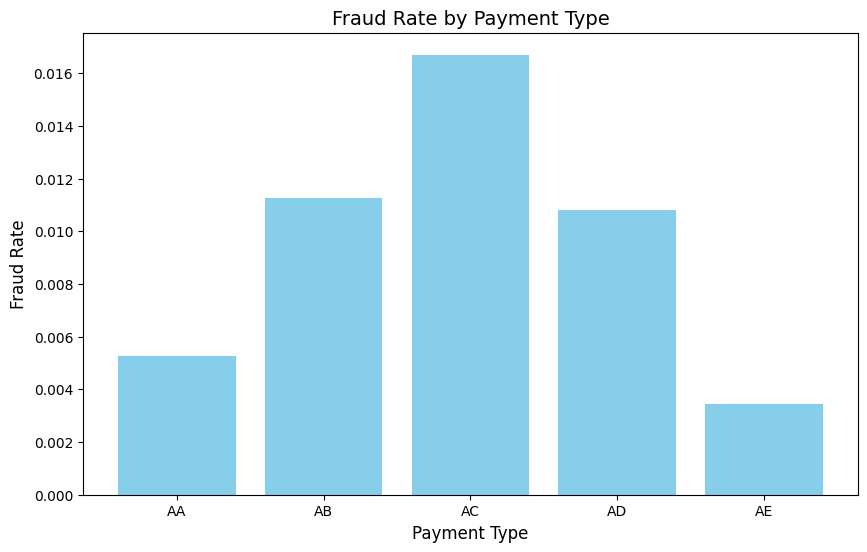

In [ ]:
contingency_table['fraud_rate'] = contingency_table[1] / (contingency_table[0] + contingency_table[1])

plt.figure(figsize=(10, 6))
plt.bar(contingency_table.index, contingency_table['fraud_rate'], color='skyblue')
plt.title('Fraud Rate by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 통계량:", chi2)
print("p-value:", p)
print("자유도(DOF):", dof)
print("기대 빈도(Expected Frequencies):\n", expected)

alpha = 0.05
if p < alpha:
    print("\n귀무가설 기각: 'payment_type'과 'fraud_bool'은 독립이 아니다.")
else:
    print("\n귀무가설 채택: 'payment_type'과 'fraud_bool'은 독립이다.")


카이제곱 통계량: 1529.219936680636
p-value: 0.0
자유도(DOF): 8
기대 빈도(Expected Frequencies):
 [[2.55400765e+05 2.84822814e+03 1.22698940e-02]
 [3.66467154e+05 4.08684000e+03 1.76057153e-02]
 [2.49290914e+05 2.78009111e+03 1.19763662e-02]
 [1.17526352e+05 1.31065333e+03 5.64616901e-03]
 [2.85816027e+02 3.18741901e+00 1.37310958e-05]]

귀무가설 기각: 'payment_type'과 'fraud_bool'은 독립이 아니다.


In [ ]:
total_fraud_count = contingency_table[1].sum()
fraud_percentage_table = contingency_table[1] / total_fraud_count
print("사기 발생 비율 (전체 사기 기준):")
print(fraud_percentage_table)

사기 발생 비율 (전체 사기 기준):
payment_type
AA    0.123674
AB    0.378003
AC    0.381630
AD    0.116602
AE    0.000091
Name: 1, dtype: float64


Text(0, 0.5, 'Fraud Occurrence Percentage')

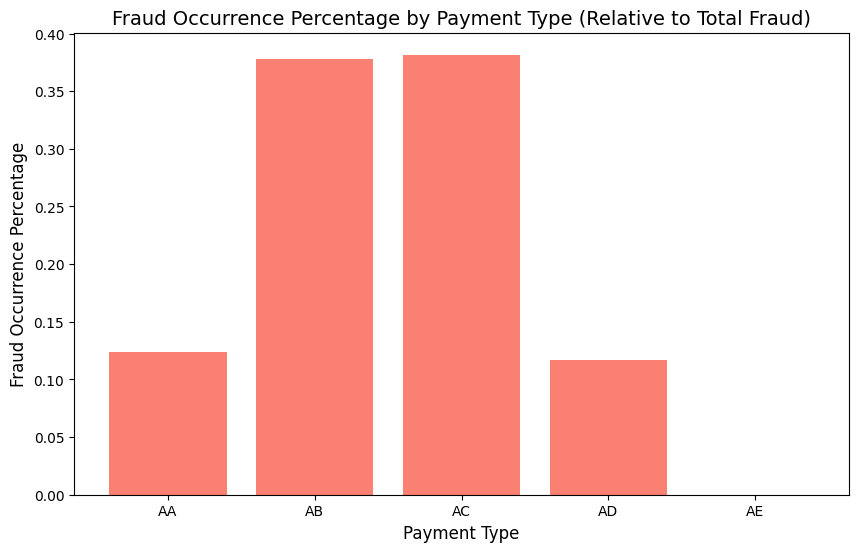

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(fraud_percentage_table.index, fraud_percentage_table, color='salmon')
plt.title('Fraud Occurrence Percentage by Payment Type (Relative to Total Fraud)', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Fraud Occurrence Percentage', fontsize=12)

- **AA**: 일반적인 신용카드 결제 (예: Visa, Mastercard)
- **AB**: 직불카드 결제
- **AC**: 은행 계좌 이체 (예: ACH, SEPA)
- **AD**: 전자지갑 결제 (예: PayPal, Apple Pay)
- **AE**: 선불카드 또는 기프트카드 결제

In [ ]:
observed = contingency_table
total = observed.values.sum()
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
expected = np.outer(row_totals, col_totals) / total
expected = pd.DataFrame(expected, index=observed.index, columns=observed.columns)
residuals = (observed - expected) / np.sqrt(expected)

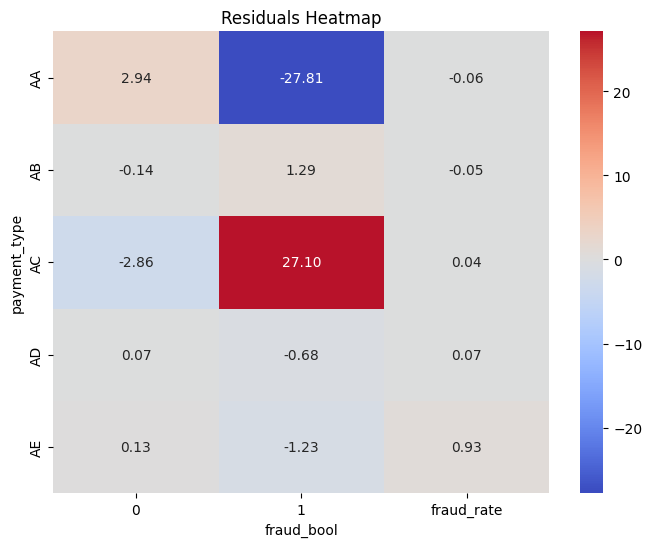

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(residuals, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Residuals Heatmap")
plt.xlabel("fraud_bool")
plt.ylabel("payment_type")
plt.show()

In [ ]:
base['foreign_request'].unique()

array([0, 1])

In [ ]:
contingency_table2 = pd.crosstab(base['foreign_request'], base['fraud_bool'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table2)

In [ ]:
print(f"카이제곱 통계량: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"자유도 (DOF): {dof}")
print("기대 빈도 (Expected Frequencies):")
print(expected)

카이제곱 통계량: 284.0608405840027
p-value: 9.787931729792e-64
자유도 (DOF): 1
기대 빈도 (Expected Frequencies):
[[9.64007394e+05 1.07506060e+04]
 [2.49636060e+04 2.78394018e+02]]


In [ ]:
import statsmodels.api as sm
ac_data = base[base['payment_type'] == 'AC']
ac_data_dummies = pd.get_dummies(ac_data[['payment_type', 'foreign_request']], drop_first=True)

X = sm.add_constant(ac_data_dummies)
y = ac_data['fraud_bool']

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.084750
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             fraud_bool   No. Observations:               252071
Model:                          Logit   Df Residuals:                   252069
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                0.001684
Time:                        07:10:04   Log-Likelihood:                -21363.
converged:                       True   LL-Null:                       -21399.
Covariance Type:            nonrobust   LLR p-value:                 2.064e-17
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.0978      0.016   -258.065      0.000      -4.129      -4.067
foreign_reques

In [ ]:
filtered_data = base[(base['foreign_request'] == 1) & (base['fraud_bool'] == 1)]
payment_type_fraud_percentage = filtered_data['payment_type'].value_counts(normalize=True)

print(payment_type_fraud_percentage)

payment_type
AB    0.405405
AC    0.318919
AA    0.147748
AD    0.127928
Name: proportion, dtype: float64


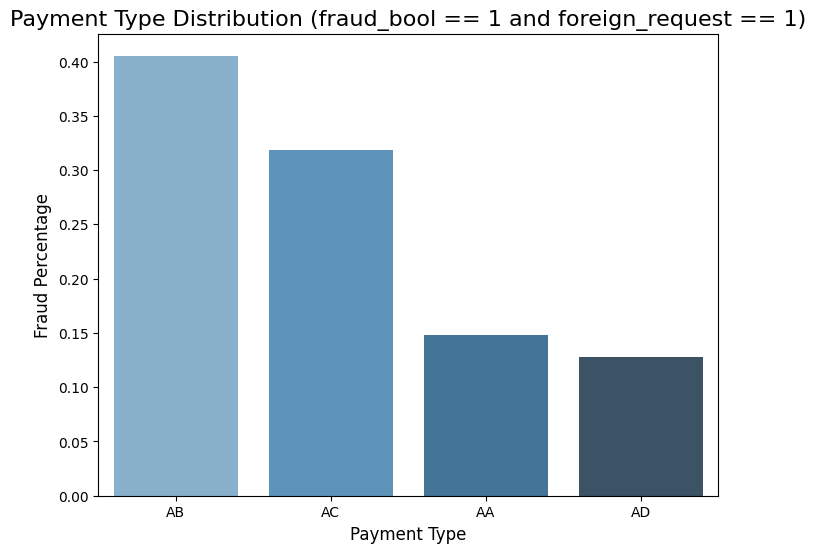

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_fraud_percentage.index, y=payment_type_fraud_percentage.values, palette='Blues_d')
plt.title('Payment Type Distribution (fraud_bool == 1 and foreign_request == 1)', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Fraud Percentage', fontsize=12)
plt.show()

In [ ]:
base['credit_risk_score'].min()

-170

In [ ]:
base['credit_risk_score'].max()

389

상관계수가 0.3 이상인 변수 쌍:
zip_count_4w           velocity_4w              0.302955
velocity_6h            velocity_24h             0.464003
                       velocity_4w              0.400254
velocity_24h           velocity_6h              0.464003
                       velocity_4w              0.539115
velocity_4w            zip_count_4w             0.302955
                       velocity_6h              0.400254
                       velocity_24h             0.539115
credit_risk_score      proposed_credit_limit    0.606141
proposed_credit_limit  credit_risk_score        0.606141
dtype: float64


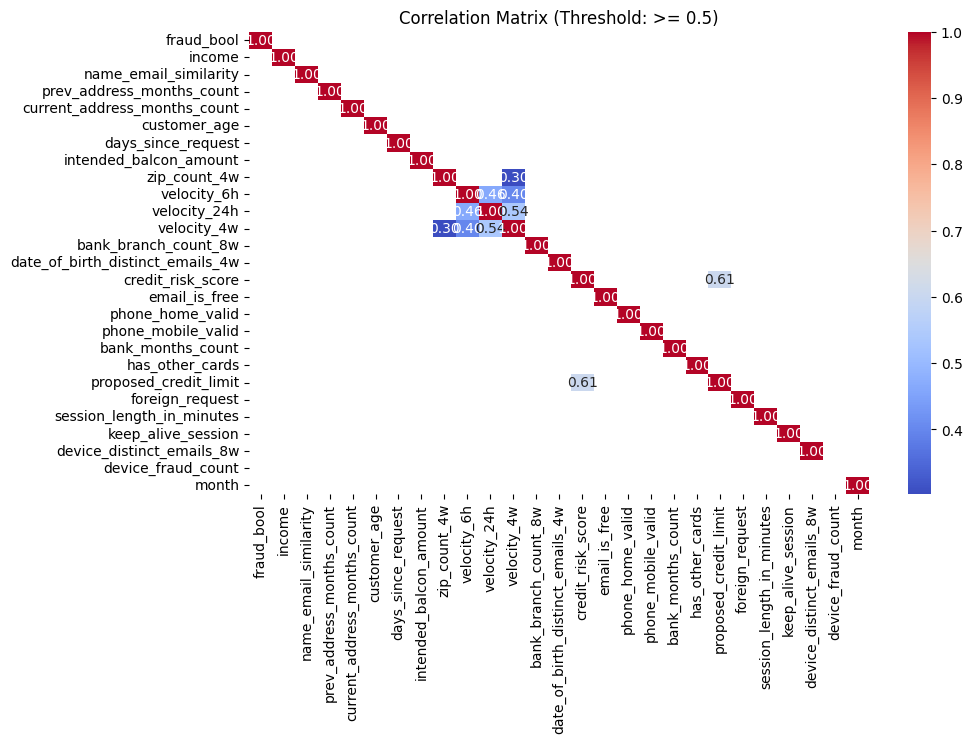

In [ ]:
numeric_base = base.select_dtypes(include=[np.number])
correlation_matrix = numeric_base.corr(method='pearson')

threshold = 0.3
high_corr_pairs = correlation_matrix.where((correlation_matrix >= threshold) & (correlation_matrix < 1)).stack()
print("상관계수가 0.5 이상인 변수 쌍:")
print(high_corr_pairs)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, mask=correlation_matrix < threshold)
plt.title("Correlation Matrix (Threshold: >= 0.5)")
plt.show()





In [ ]:
base[['credit_risk_score', 'proposed_credit_limit']].head()

,credit_risk_score,proposed_credit_limit
0,163,1500.0
1,154,1500.0
2,89,200.0
3,90,200.0
4,91,200.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = base[['credit_risk_score']]
y = base['proposed_credit_limit']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

print("R² Score:", r2_score(y, predictions))

R² Score: 0.3674074544044488


In [ ]:
base['employment_status'].unique()

array(['CB', 'CA', 'CC', 'CF', 'CD', 'CE', 'CG'], dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 독립 변수 X (상수항을 포함한 데이터프레임)
X = base[['credit_risk_score', 'proposed_credit_limit', 'customer_age','income']]  # 독립 변수들

# 상수항 추가 (회귀 분석에서 필요)
X = add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 출력
print(vif)

                Variable        VIF
0                  const  12.915715
1      credit_risk_score   1.620551
2  proposed_credit_limit   1.586785
3           customer_age   1.042693
4                 income   1.040734


In [ ]:
base['prev_address_months_count'].describe()

count    1000000.000000
mean          16.718568
std           44.046230
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           12.000000
max          383.000000
Name: prev_address_months_count, dtype: float64

In [ ]:
base['current_address_months_count'].describe()

count    1000000.000000
mean          86.587867
std           88.406599
min           -1.000000
25%           19.000000
50%           52.000000
75%          130.000000
max          428.000000
Name: current_address_months_count, dtype: float64

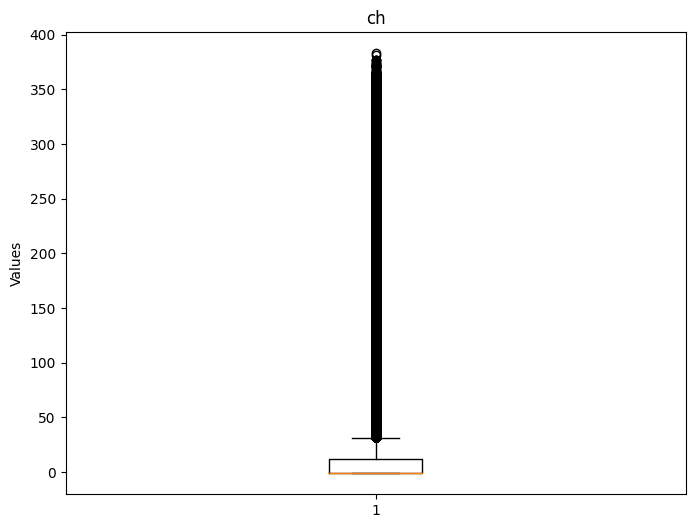

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(base['prev_address_months_count'])
plt.title('ch')
plt.ylabel('Values')
plt.show()

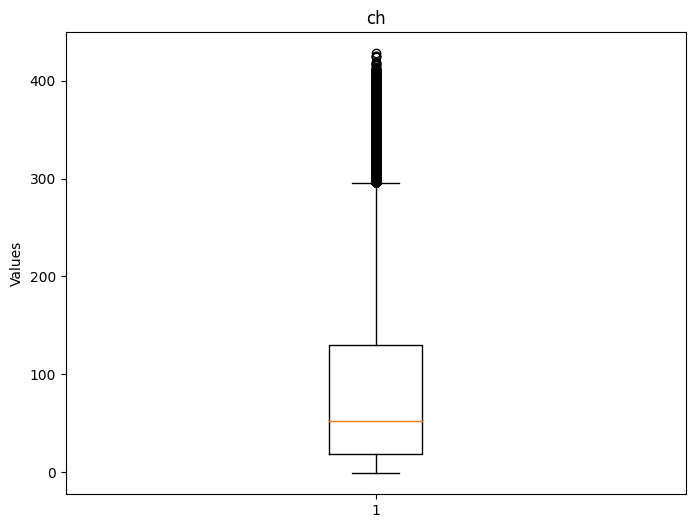

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(base['current_address_months_count'])
plt.title('ch')
plt.ylabel('Values')
plt.show()

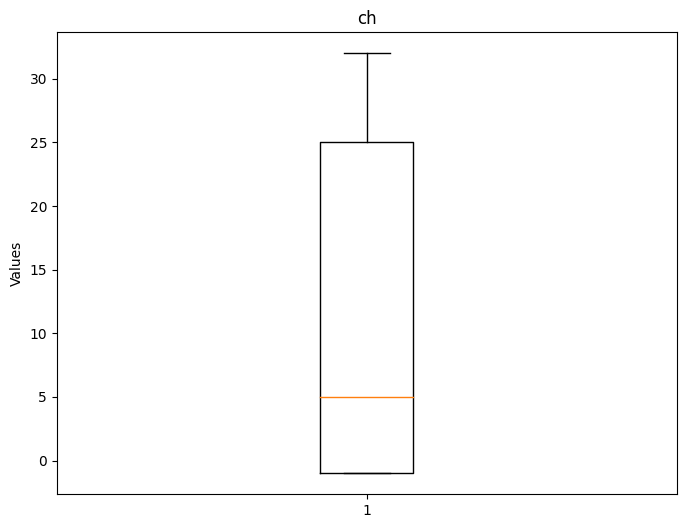

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(base['bank_months_count'])
plt.title('ch')
plt.ylabel('Values')
plt.show()

In [ ]:
#결측치(-1) 제거
base_cleaned = base[base['prev_address_months_count'] != -1]

Q1 = base_cleaned['prev_address_months_count'].quantile(0.25)
Q3 = base_cleaned['prev_address_months_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = base_cleaned[(base_cleaned['prev_address_months_count'] < lower_bound) | (base_cleaned['prev_address_months_count'] > upper_bound)]
non_outliers = base_cleaned[(base_cleaned['prev_address_months_count'] >= lower_bound) & (base_cleaned['prev_address_months_count'] <= upper_bound)]

outlier_count = outliers.shape[0]
non_outlier_count = non_outliers.shape[0]

print(f"이상치 개수: {outlier_count}")
print(f"이상치가 아닌 값 개수: {non_outlier_count}")
print("이상치비율:",outlier_count/non_outlier_count)

이상치 개수: 26557
이상치가 아닌 값 개수: 260523
이상치비율: 0.10193725697923024


In [ ]:
base['prev_address_months_count'].value_counts()[-1]

712920

In [ ]:
Q1 = base['current_address_months_count'].quantile(0.25)
Q3 = base['current_address_months_count'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = base[(base['current_address_months_count'] < lower_bound) | (base['current_address_months_count'] > upper_bound)]
non_outliers = base[(base['current_address_months_count'] >= lower_bound) & (base['current_address_months_count'] <= upper_bound)]

outlier_count = outliers.shape[0]
non_outlier_count = non_outliers.shape[0]

print(f"이상치 개수: {outlier_count}")
print(f"이상치가 아닌 값 개수: {non_outlier_count}")
print("이상치비율:",outlier_count/non_outlier_count)

이상치 개수: 41001
이상치가 아닌 값 개수: 958999
이상치비율: 0.042753954905062466


In [ ]:
Q1 = base['bank_months_count'].quantile(0.25)
Q3 = base['bank_months_count'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = base[(base['bank_months_count'] < lower_bound) | (base['bank_months_count'] > upper_bound)]
non_outliers = base[(base['bank_months_count'] >= lower_bound) & (base['bank_months_count'] <= upper_bound)]

outlier_count = outliers.shape[0]
non_outlier_count = non_outliers.shape[0]

print(f"이상치 개수: {outlier_count}")
print(f"이상치가 아닌 값 개수: {non_outlier_count}")

이상치 개수: 0
이상치가 아닌 값 개수: 1000000


In [ ]:
from scipy import stats

# 'payment_type'에 따른 'income'의 ANOVA 분석
groups = [base[base['payment_type'] == category]['income'] for category in base['payment_type'].unique()]
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")
if p_value < 0.05:
    print("유의미한 차이가 있습니다.")
else:
    print("유의미한 차이가 없습니다.")

F-statistic: 854.492265595771, p-value: 0.0
유의미한 차이가 있습니다.


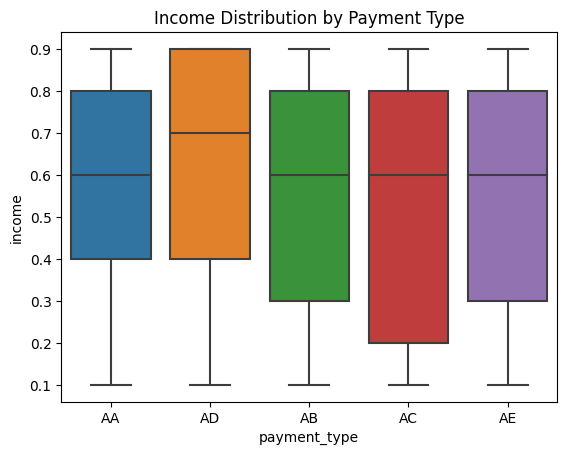

In [ ]:
sns.boxplot(x='payment_type', y='income', data=base)
plt.title('Income Distribution by Payment Type')
plt.show()

In [ ]:
m_income = base['income'].mean()
low_income_data = base[base['income'] < m_income]

payment_type_counts = low_income_data['payment_type'].value_counts(normalize=True)
print(payment_type_counts)

payment_type
AB    0.380989
AC    0.270566
AA    0.239538
AD    0.108594
AE    0.000313
Name: proportion, dtype: float64


In [ ]:
income_1 = base['income'].quantile(0.3)
low_income_data = base[base['income'] < income_1]

payment_type_counts = low_income_data['payment_type'].value_counts(normalize=True)
print(payment_type_counts)

payment_type
AB    0.384973
AC    0.277167
AA    0.231476
AD    0.106081
AE    0.000303
Name: proportion, dtype: float64


In [ ]:
low_income_data = base[base['income'] <= 0.3]

fraud_count = low_income_data[low_income_data['fraud_bool'] == 1].shape[0]
total_fraud_count = base[base['fraud_bool'] == 1].shape[0]

# 결과 출력
print(f"Income이 0.3 이하인 경우의 사기 비율: {fraud_count/total_fraud_count}")

Income이 0.3 이하인 경우의 사기 비율: 0.15277903708405113


In [ ]:
low_income_data = base[base['income'] <= 0.3]

# income이 0.3 이하인 데이터의 비율 계산
low_income_percentage = len(low_income_data) / len(base) * 100

# 결과 출력
print(f"Income이 0.3 이하인 데이터의 비율: {low_income_percentage:.2f}%")

Income이 0.3 이하인 데이터의 비율: 27.76%


In [ ]:
from scipy.stats import levene

# 두 집단 데이터 생성
group1 = base[base['fraud_bool'] == 1]['income']
group2 = base[base['fraud_bool'] == 0]['income']

# Levene's test 수행
stat, p_value = levene(group1, group2)

print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

# 결과 해석
if p_value < 0.05:
    print("분산이 같지 않다 (귀무가설 기각).")
else:
    print("분산이 같다 (귀무가설 채택).")

Levene's test statistic: 1138.5362549458391
p-value: 1.9242443493616615e-249
분산이 같지 않다 (귀무가설 기각).


In [ ]:
from scipy.stats import ttest_ind

# 두 집단 분리
group1 = base[base['fraud_bool'] == 1]['income']  # fraud_bool이 1인 고객
group2 = base[base['fraud_bool'] == 0]['income']  # fraud_bool이 0인 고객

# 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)  # 등분산 가정 여부: True

# 결과 출력
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 45.12500271029295
p-value: 0.0


In [ ]:
from scipy.stats import ttest_ind

# Welch의 t-검정 수행 (equal_var=False)
stat, p_value = ttest_ind(group1, group2, equal_var=False) # 등분산 가정 여부: False

print(f"t-statistic: {stat}")
print(f"p-value: {p_value}")

# 결과 해석
if p_value < 0.05:
    print("두 집단 간의 평균에 유의미한 차이가 있다.")
else:
    print("두 집단 간의 평균에 유의미한 차이가 없다.")

t-statistic: 49.22959363344832
p-value: 0.0
두 집단 간의 평균에 유의미한 차이가 있다.


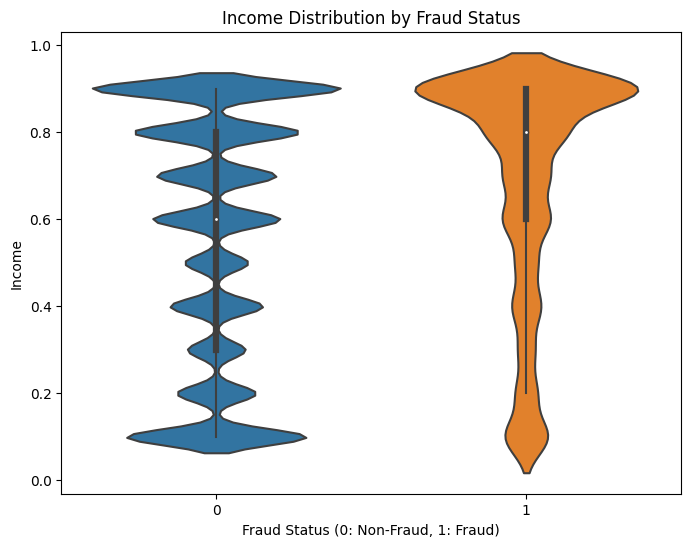

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='fraud_bool', y='income', data=base)
plt.title('Income Distribution by Fraud Status')
plt.xlabel('Fraud Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Income')
plt.show()